### Project Name : Employee Performance Analysis INX Future Inc.

### Source Code : 

### Data Pre-Processing :

### Step-1 : Importing the necessary Libraries  

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import itertools
warnings.filterwarnings('ignore')
%matplotlib inline

### Step-2 : Importing the Data set

In [2]:
Data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
#2.1 Displaying the shape to know the status of the dataset:
Data.shape

(1200, 28)

In [4]:
Data.size

33600

In [5]:
#2.2 Displaying the entire data of the header names(column names) with top of the  records from the given dataset file.

Data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
#2.3 Displaying the entire data of the header names(column names) with bottom of the  records from the given dataset file.
Data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [7]:
#2.4 Display the full information of the data with the data types, and their summary of the records : 

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [11]:
DataFrame.duplicated(Data)
#pandas.DataFrame.duplicated(Data)

0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Length: 1200, dtype: bool

In [14]:
#find duplicate rows across all columns
duplicateRows = Data[Data.duplicated()]
#duplicateRows = df[df.duplicated()]

In [16]:
#find duplicate rows across specific columns
#duplicateRows = Data[Data.duplicated(['col1', 'col2'])]
#duplicateRows = df[df.duplicated(['col1', 'col2'])]

### Step-3 : Handiling the Missing data

In [17]:
# 3.1. Check for missing values ot be findout the Nan values or missing values:
#      1. Displaying the Nan values from the entire dataset, and displaying their summary of the individual columns.      
Data.isnull().sum() 

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [18]:
##3.2. Summary of the total Nan values :
Data.isnull().sum().sum()

0

<AxesSubplot:>

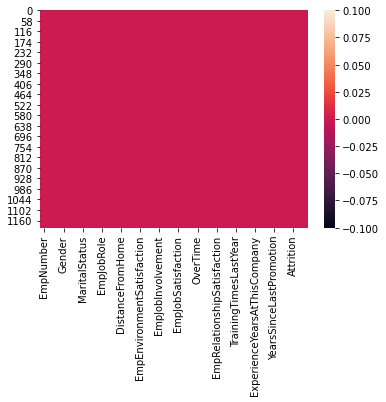

In [19]:
## 3.3 . Visualizing the missing values
sns.heatmap(Data.isnull())

#### 3.4 checking Special characters :

In [20]:
#1.Displaying entire dataset again to be check special characters in that data.
Data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [21]:
# Filling the special characters with the NaN.
Data.replace(['$','*','?','-'],np.nan,inplace=True)

In [22]:
# Displaying  the entire dataset to be check particular special character place, either its 
# changed to as per the NaN.
Data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [23]:
# Cheking the  Nan values of status again after filled the cpecial characters
Data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [24]:
Data.isnull().sum().sum()

0

#### 3.5. Dealing with the Nan values (missng values):

In [25]:
# Displaying  the entire dataset to be check particular Nan values place, either its 
# changed or not.
Data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [26]:
# Cheking the  Nan values of status again after filled the all Nan values
Data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [27]:
Data.isnull().sum().sum()

0

#### 3.6. Checking Duplicates exist in the dataset :

In [28]:
# It is recommended to check for duplicates right after dealing with NaN values
Data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [29]:
Data.duplicated()                  #checks for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Length: 1200, dtype: bool

In [30]:
Data[Data.duplicated()]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [31]:
Data.duplicated().sum()

0

In [32]:
Data.duplicated().value_counts()

False    1200
dtype: int64

In [33]:
Data.shape    # Orgianl records = 1200, after duplication = 1200

(1200, 28)

In [34]:
Data.duplicated().sum()

0

In [35]:
# Dropping the first columns as it is of no use for analysis.
Data.drop(['EmpNumber'],inplace=True,axis=1)

In [36]:
Data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


### Exploratory Data Analysis
### 2. Department wise performances of the Exploratory Data Analysis (EDA)

In [37]:
Data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [38]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [39]:
Data.nunique()

Age                             43
Gender                           2
EducationBackground              6
MaritalStatus                    3
EmpDepartment                    6
EmpJobRole                      19
BusinessTravelFrequency          3
DistanceFromHome                29
EmpEducationLevel                5
EmpEnvironmentSatisfaction       4
EmpHourlyRate                   71
EmpJobInvolvement                4
EmpJobLevel                      5
EmpJobSatisfaction               4
NumCompaniesWorked              10
OverTime                         2
EmpLastSalaryHikePercent        15
EmpRelationshipSatisfaction      4
TotalWorkExperienceInYears      40
TrainingTimesLastYear            7
EmpWorkLifeBalance               4
ExperienceYearsAtThisCompany    37
ExperienceYearsInCurrentRole    19
YearsSinceLastPromotion         16
YearsWithCurrManager            18
Attrition                        2
PerformanceRating                3
dtype: int64

In [40]:
# identifying the types of Departments
Data["EmpDepartment"].unique()#Here displayed the columun'EmpDepartment' of number of unique numbers

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [41]:
Data["EmpDepartment"].nunique()

6

In [42]:
Data.loc[:,"EmpDepartment"].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [43]:
Data.loc[:,"PerformanceRating"].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [44]:
pd.crosstab(index=Data["EmpDepartment"], columns=Data["PerformanceRating"])

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


#### Selecting the Target fields & getting the relation to be show department wise performance

In [45]:
Data.describe() 

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [46]:
corelation = Data.corr()

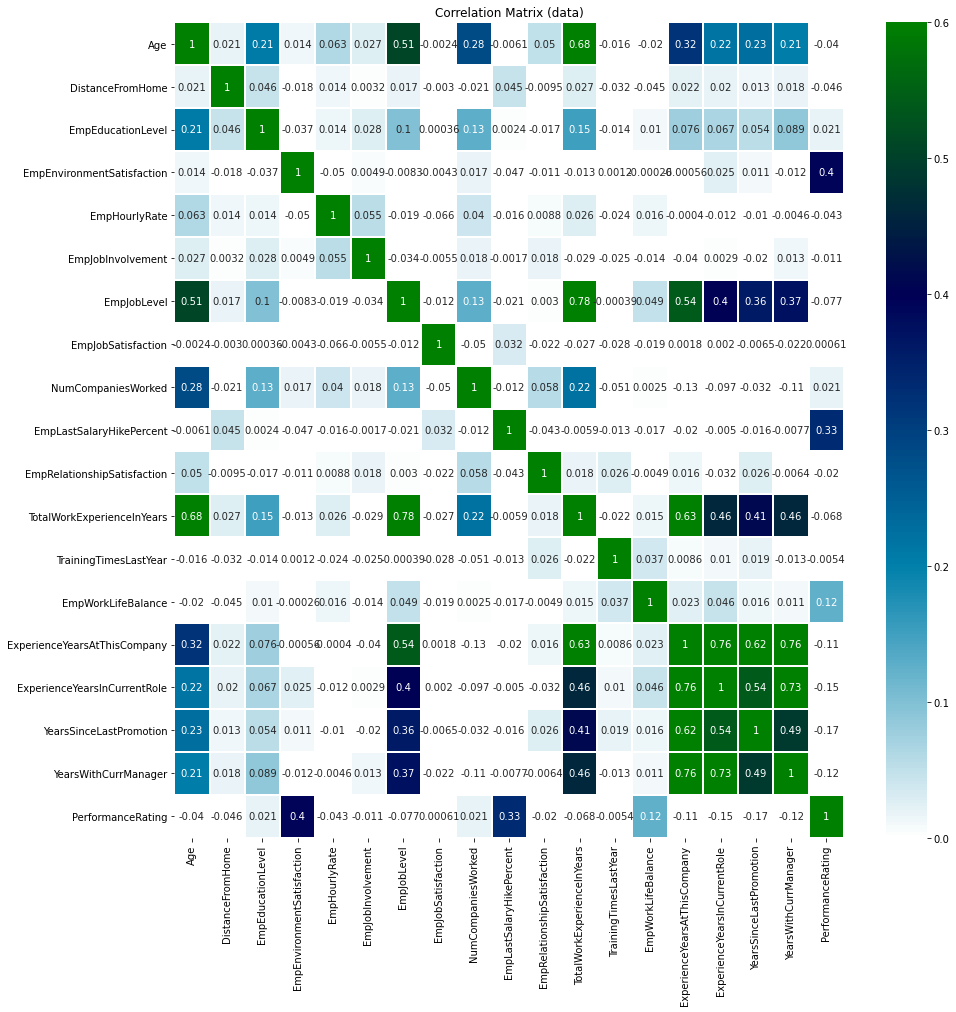

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(corelation,annot=True,annot_kws={"size":10},linewidths=1,vmin=0,vmax=0.6,cmap='ocean_r')
plt.title("Correlation Matrix (data)")
plt.show() 

In [48]:
Data.corr().PerformanceRating

Age                            -0.040164
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
YearsWithCurrManager           -0.122313
PerformanceRating               1.000000
Name: PerformanceRating, dtype: float64

### Relationship Analysis between the Department & Performance Rating

In [49]:
Dep = Data.loc[:,['EmpDepartment','PerformanceRating']]
Dep

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3
...,...,...
1195,Sales,4
1196,Development,3
1197,Development,3
1198,Data Science,3


In [50]:
corelation2 = Dep.corr()

<AxesSubplot:>

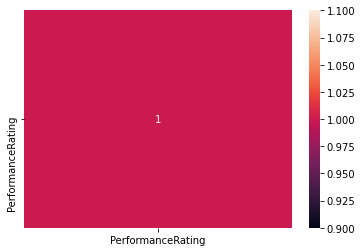

In [51]:
sns.heatmap(corelation2, xticklabels = corelation2.columns, yticklabels=corelation2.columns,annot=True)

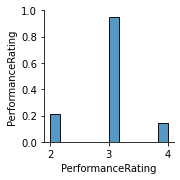

In [52]:
sns.pairplot(Dep)

In [53]:
DF = Data.groupby("EmpDepartment")["PerformanceRating"].sum()
DF

EmpDepartment
Data Science                61
Development               1114
Finance                    136
Human Resources            158
Research & Development    1002
Sales                     1067
Name: PerformanceRating, dtype: int64

Text(0.5, 1.0, 'Department wise Analysis')

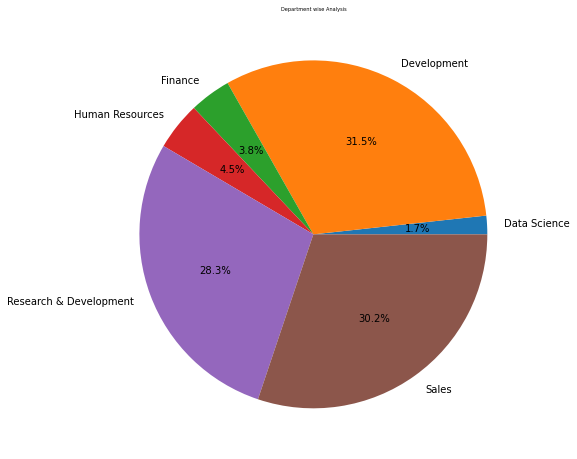

In [54]:
pie, ax = plt.subplots(figsize=[8,8])
labels = DF.keys()
plt.pie( x = DF, autopct = "%.01f%%", labels=labels)
plt.title("Department wise Analysis", fontsize =5)
#pie.savefig("Delivery Piechart.png")

<AxesSubplot:xlabel='EmpDepartment'>

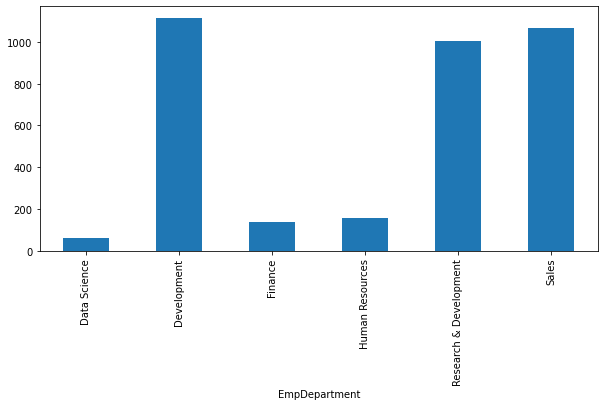

In [55]:
plt.figure(figsize=(10,4.5))
DF.plot.bar()

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

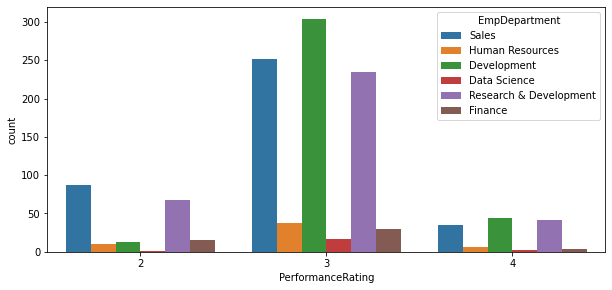

In [56]:
plt.figure(figsize=(10,4.5))
sns.countplot( x = Data["PerformanceRating"], hue = Data["EmpDepartment"])

#### Creating a new dataframe to analyze each department separately

In [57]:
department = pd.get_dummies(Data['EmpDepartment'])
performance = pd.DataFrame(Data['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

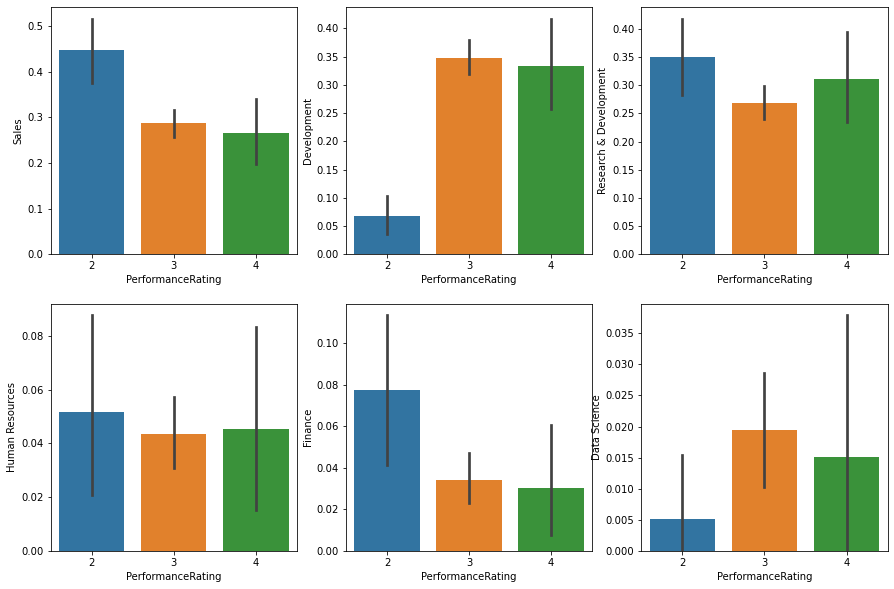

In [58]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

### Data Processing/ Data Munging

### Step-4. Encoding  Categorical Data  :

In [59]:
# The following command allows the dataset to be examined for categorical value:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [60]:
Data.dtypes.value_counts()

int64     19
object     8
dtype: int64

In [61]:
#Using the LabelEncoding to  converting categorical data(dtypes of objects) into 
#numerical data(dtyps of integers).
#syntax : data.categorical_data = encoder.fit_transform(data.categorical_data
encoder = LabelEncoder()

In [62]:
#Data.EmpNumber = encoder.fit_transform(Data.EmpNumber)
Data.Gender  = encoder.fit_transform(Data.Gender)
Data.EducationBackground  = encoder.fit_transform(Data.EducationBackground )
Data.MaritalStatus = encoder.fit_transform(Data.MaritalStatus)
Data.EmpDepartment = encoder.fit_transform(Data.EmpDepartment)
Data.EmpJobRole = encoder.fit_transform(Data.EmpJobRole)
Data.BusinessTravelFrequency = encoder.fit_transform(Data.BusinessTravelFrequency)
Data.OverTime  = encoder.fit_transform(Data.OverTime )
Data.Attrition  = encoder.fit_transform(Data.Attrition )

In [63]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int32
 2   EducationBackground           1200 non-null   int32
 3   MaritalStatus                 1200 non-null   int32
 4   EmpDepartment                 1200 non-null   int32
 5   EmpJobRole                    1200 non-null   int32
 6   BusinessTravelFrequency       1200 non-null   int32
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

### Pre-processed Data :

In [64]:
# Checking the final pre-processed Data :
Data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


## Feature Selection of Top 3 factors   
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
-     Top 3 factors which affect the employee performance are 1. Employee EnvironmentSatisfaction, 2. Employee Last Salary Hike Percent and 3. Years Since Last Promotion

In [65]:
X = Data.loc[:,['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','YearsSinceLastPromotion']]
Y = Data.loc[:,['PerformanceRating']]

### Step-5 : Splitting the Dataset in to Test set and Training test 

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2,random_state=0)

### Step - 6 : Feature Scaling 

In [67]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
X_train.shape

(960, 3)

In [69]:
X_test.shape

(240, 3)

### Step-7 : Model Selection

### 1.Support Vector Machine from SVC Model :

In [70]:
# Training the model
from sklearn.svm import SVC
Model_svc = SVC(kernel='rbf', C=100,random_state=0)

In [71]:
Model_svc.fit(X_train, Y_train)

SVC(C=100, random_state=0)

In [72]:
# Predicting the model
y_predict_svm = Model_svc.predict(X_test)

In [73]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(Y_test,y_predict_svm))
print(classification_report(Y_test,y_predict_svm))

0.875
              precision    recall  f1-score   support

           2       0.60      0.82      0.69        33
           3       0.94      0.89      0.91       179
           4       0.92      0.86      0.89        28

    accuracy                           0.88       240
   macro avg       0.82      0.85      0.83       240
weighted avg       0.89      0.88      0.88       240



### 2 .  Random forest Classification Model :

In [74]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

In [75]:
modelrf = RandomForestClassifier(n_estimators =48)

In [76]:
modelrf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=48)

In [77]:
modelrf.score(X_test,Y_test)*100

86.66666666666667

In [78]:
# Predicting the model
y_predict_rf = modelrf.predict(X_test)

In [79]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(Y_test,y_predict_rf))
print(classification_report(Y_test,y_predict_rf))

0.8666666666666667
              precision    recall  f1-score   support

           2       0.61      0.67      0.64        33
           3       0.92      0.91      0.91       179
           4       0.86      0.86      0.86        28

    accuracy                           0.87       240
   macro avg       0.80      0.81      0.80       240
weighted avg       0.87      0.87      0.87       240



## 3. XGBoost Classifier Model :

In [73]:
pip install xgboost

In [80]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

In [81]:
model_xgb.fit(X_train,Y_train)

[18:21:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [82]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [83]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(Y_test,y_predict_xgb))
print(classification_report(Y_test,y_predict_xgb))

0.8541666666666666
              precision    recall  f1-score   support

           2       0.58      0.58      0.58        33
           3       0.91      0.91      0.91       179
           4       0.86      0.86      0.86        28

    accuracy                           0.85       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.85      0.85      0.85       240



### Final Evaluation score of  the model for the Top 3 factors :

-     In the section below, we used algorithms like 1.Logistic Regression, 2.Support Vector Machine, 3.Decision Tree, 4.Random Forest, 5.XGBoost Classifier to calculate the accuracy and found out that final accuracy scores as per the bellow:
      
      1. XGBoost Classifier gives the maximum accuracy of 88%.

## Feature Selection of Top 10 factors :  
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
-     A trained model which can predict the employee performance based on factors as 
      inputs are 1)EmpDepartment,2)EmpJobRole, 3)EmpEnvironmentSatisfaction, 4)EmpLastSalaryHikePercent,5)EmpWorkLifeBalance,6)ExperienceYearsAtThisCompany ,7)ExperienceYearsInCurrentRole,8)YearsSinceLastPromotion, 9)YearsWithCurrManager

In [84]:
X = Data.iloc[:,[4,5,9,16,20,21,22,23,24]]
X

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1195,5,13,4,20,3,6,5,0,4
1196,1,15,4,17,3,1,0,0,0
1197,1,15,4,11,3,20,8,3,8
1198,0,1,4,14,4,8,7,7,7


In [85]:
len(X)

1200

In [86]:
Y = Data.loc[:,['PerformanceRating']]
Y

,PerformanceRating
0,3
1,3
2,4
3,3
4,3
...,...
1195,4
1196,3
1197,3
1198,3


### Splitting the Dataset in to Test set and Training test

In [87]:
#x = data.input_features
#y = data.output_features
X = X = Data.iloc[:,[4,5,9,16,20,21,22,23,24]]
Y = Data.loc[:,['PerformanceRating']]

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state=0)

### Feature Scaling 

In [89]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
X_train.shape

(960, 9)

In [91]:
X_test.shape

(240, 9)

### Model Selection :

### 1.Support Vector Machine from SVC Model :

In [88]:
# Training the model
from sklearn.svm import SVC
Model_svc = SVC(kernel='rbf', C=100, random_state=0)

In [89]:
Model_svc.fit(X_train, y_train)

SVC(C=100, random_state=0)

In [90]:
# Predicting the model
y_predict_svm = Model_svc.predict(X_test)

In [91]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8666666666666667
              precision    recall  f1-score   support

           2       0.73      0.82      0.77        33
           3       0.94      0.89      0.92       179
           4       0.64      0.75      0.69        28

    accuracy                           0.87       240
   macro avg       0.77      0.82      0.79       240
weighted avg       0.88      0.87      0.87       240



### 2. Decision Tree Classification Model :

In [92]:
# Training the model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [93]:
Model_DTC= tree.DecisionTreeClassifier()

In [94]:
Model_DTC.fit(X_train, y_train )

DecisionTreeClassifier()

In [95]:
# Predicting the model
y_predict_dtree = Model_DTC.predict(X_test)

In [96]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9083333333333333
              precision    recall  f1-score   support

           2       0.76      0.76      0.76        33
           3       0.93      0.94      0.94       179
           4       0.92      0.86      0.89        28

    accuracy                           0.91       240
   macro avg       0.87      0.85      0.86       240
weighted avg       0.91      0.91      0.91       240



### 3 .  Random forest Classification Model :

In [97]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

In [98]:
modelrf = RandomForestClassifier(n_estimators =48)

In [99]:
modelrf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=48)

In [100]:
modelrf.score(X_test,y_test)*100

95.0

In [101]:
# Predicting the model
y_predict_rf = modelrf.predict(X_test)

In [102]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.95
              precision    recall  f1-score   support

           2       0.91      0.94      0.93        33
           3       0.97      0.97      0.97       179
           4       0.89      0.86      0.87        28

    accuracy                           0.95       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.95      0.95      0.95       240



## 4. XGBoost Classifier Model :

In [103]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

[22:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [104]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [105]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9291666666666667
              precision    recall  f1-score   support

           2       0.82      0.85      0.84        33
           3       0.96      0.96      0.96       179
           4       0.89      0.86      0.87        28

    accuracy                           0.93       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.93      0.93      0.93       240



### Final Evaluation scores of  the models :

-     In the section below, we used algorithms like 1)Support Vector Machine, 2)Decision Tree, 3)Random Forest, 4)XGBoost Classifier to calculate the accuracy and found out that final accuracy scores as per the bellow:

   1. XGBoost Classifier       gives the maximum accuracy of 97%.

###                                              ***   E N D   ***

### From the Student  : G.Eshwar